In [231]:
from tensorflow.keras.losses import MSE
import tensorflow as tf
import keras
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [232]:
def generate_image_adversary(model, image, label, eps=1 / 255.0):
    # cast the image
    image = tf.cast(image, tf.float32)
    # record our gradients
    with tf.GradientTape() as tape:
        # explicitly indicate that our image should be tacked for
        # gradient updates
        tape.watch(image)
        # use our model to make predictions on the input image and
        # then compute the loss
        pred = model(image)
        loss = MSE(label, pred)
    # calculate the gradients of loss with respect to the image, then
    # compute the sign of the gradient
    gradient = tape.gradient(loss, image)
    signedGrad = tf.sign(gradient)
    # construct the image adversary
    adversary = (image + (signedGrad * eps)).numpy()
    # return the image adversary to the calling function
    return adversary

In [233]:
def transform_model_image(model, image):
    model = keras.models.load_model(model)

    img = cv2.imread(image)
    img = np.reshape(img, [1, 224, 224, 3])

    return model, img

In [234]:
def make_prediction(model, image):
    predicted_values = model.predict(image)
    predicted_class = np.array(predicted_values).argmax()
    return predicted_class

In [235]:
model, image = transform_model_image("model_smaller.h5", "renoir_test.jpg")
label = make_prediction(model, image)

1/1 [==============================] - 0s 213ms/step


In [236]:
print(label)

1


In [237]:
adversary = generate_image_adversary(model, image, label)
adversary_label = make_prediction(model, adversary)
print(adversary_label)

1/1 [==============================] - 0s 245ms/step
1


In [238]:
i = 0
while adversary_label == label and i <= 2000:
    i = i + 100
    adversary = generate_image_adversary(model, image, label, i / 255.0)
    adversary_label = make_prediction(model, adversary)

1/1 [==============================] - 0s 103ms/step


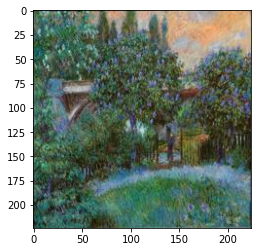

In [239]:
plt.imshow((image[0]).astype(np.uint8))
plt.show()

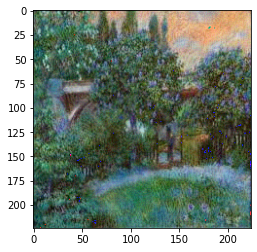

In [240]:
plt.imshow((adversary[0]).astype(np.uint8))
plt.show()

In [241]:
predicted_values = model.predict(image)
predicted_class = np.array(predicted_values).argmax()
print(predicted_values)
print(predicted_class)

1/1 [==============================] - 0s 108ms/step
[[0.15527816 0.43241963 0.36614263 0.04615954]]
1


In [242]:
predicted_values = model.predict(adversary)
predicted_class = np.array(predicted_values).argmax()
print(predicted_values)
print(predicted_class)

1/1 [==============================] - 0s 105ms/step
[[0.15522783 0.46875522 0.35016298 0.02585396]]
1
